In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# 1. Import data, QC

In [101]:
data=pd.read_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/data_EDA.csv')
data.head()


,Site,Request_id,Year,Quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [102]:
# set Request_id,GE_ID columns as index since they have unique values
data.set_index(['Request_id','GE_ID'], inplace=True)
data.head()

,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [103]:
data.shape

(14811, 15)

In [104]:
# change year and quarter column type to object
data['Year']=data['Year'].astype(object)
data['Quarter']=data['Quarter'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14811 entries, (178950, 67133087) to (232976, 99620976)
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Site                    14811 non-null  object 
 1   Year                    14811 non-null  object 
 2   Quarter                 14811 non-null  object 
 3   BreedingZone            14811 non-null  object 
 4   EvaluationZone          14811 non-null  object 
 5   HetGrp                  14811 non-null  object 
 6   Type                    14811 non-null  object 
 7   Actual_embryos          14811 non-null  int64  
 8   Actual_haploid_embryos  14811 non-null  int64  
 9   Hap_rate                14811 non-null  int64  
 10  Actual_Elle_pots        14811 non-null  float64
 11  Actual_D0_plants        14811 non-null  float64
 12  Trans_rate              14811 non-null  float64
 13  Actual_D0_poll          14811 non-null  float64
 14  Poll_rat

# 4 Feature Engineering

Missinge values were imputed in wrangling session, so no nan values are there in this dataset


## 4.1 Feature engineering of Numeric features of the dataset

### 4.1.1 slicing Numeric features of the dataset

In [109]:
#Use 'select_dtypes` method to select columns of dtype 'object'
num_fea=data.select_dtypes(exclude='object').copy()
num_fea.head()

,,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,
178950,67133087,9425,1308,14,599.0,537.0,90.0,256.0,48.0
178955,67133419,8029,1206,15,699.0,606.0,87.0,299.0,49.0
178969,67226512,3373,976,29,466.0,270.0,58.0,196.0,73.0
178971,67226501,4227,1189,28,518.0,310.0,60.0,184.0,59.0
178973,67226717,5360,1277,24,623.0,516.0,83.0,286.0,55.0


### 4.1.1 Plotting Distribution of Numeric Features of the Dataset

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


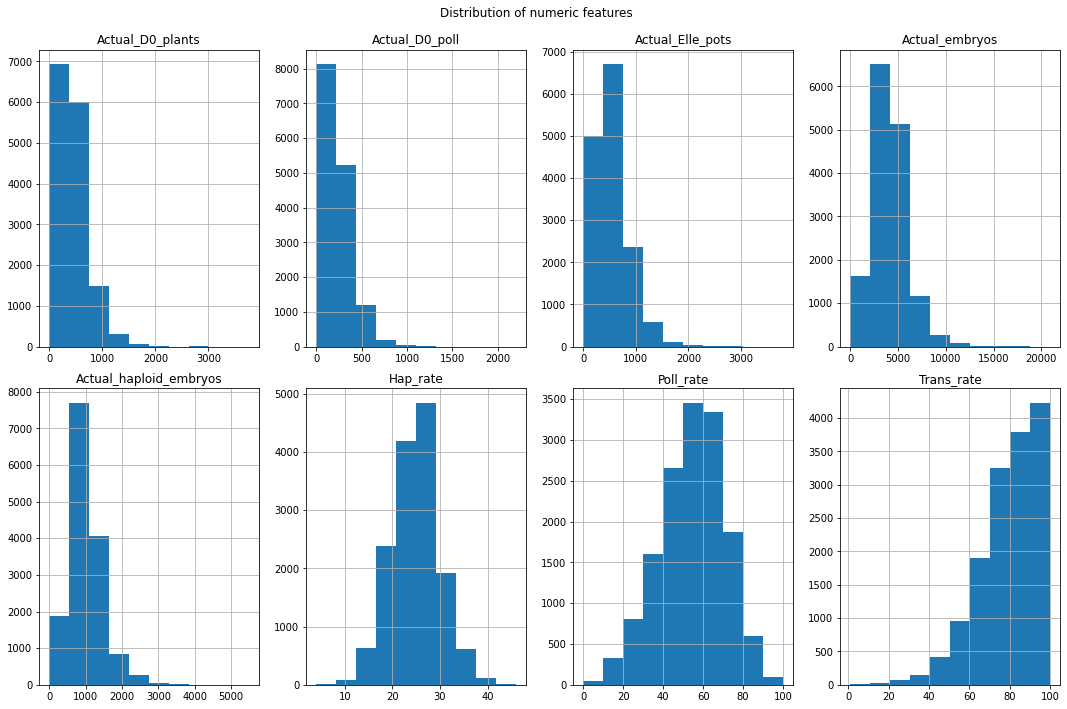

In [111]:
num_fea.hist(layout=(2,4), figsize=(15,10))
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=1.0)      
#Tight layout often produces nice results but requires the title to be spaced accordingly
plt.tight_layout()
plt.suptitle('Distribution of numeric features', Fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()

## 4.2 Is Log transformation required???????????????
Since most of the numeric variables of the dataset had skewed distribution, planning to do Log transformation
A critical note: The data you apply log transform must have only positive values, otherwise you receive an error.

### 4.2.1 Log Transform the Numeric Columns

In [112]:
# log transform the numeric columns to check if skewness is improved? 
numeric_df = data.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df.head()

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,3.974281,3.116608,1.146128,2.777427,2.729974,1.954243,2.408240,1.681241
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,3.904661,3.081347,1.176091,2.844477,2.782473,1.939519,2.475671,1.690196
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3.528016,2.989450,1.462398,2.668386,2.431364,1.763428,2.292256,1.863323
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,3.626032,3.075182,1.447158,2.714330,2.491362,1.778151,2.264818,1.770852
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,3.729165,3.106191,1.380211,2.794488,2.712650,1.919078,2.456366,1.740363


### 4.2.2 Plotting log transformed Numeric features of the dataset

### 4.2.2.1 slicing transformed Numeric features of the dataset

In [113]:
# slicing numeric columns from the log transformed dataframe
df=numeric_df.select_dtypes(exclude='object')
df.head()

,,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,
178950,67133087,3.974281,3.116608,1.146128,2.777427,2.729974,1.954243,2.408240,1.681241
178955,67133419,3.904661,3.081347,1.176091,2.844477,2.782473,1.939519,2.475671,1.690196
178969,67226512,3.528016,2.989450,1.462398,2.668386,2.431364,1.763428,2.292256,1.863323
178971,67226501,3.626032,3.075182,1.447158,2.714330,2.491362,1.778151,2.264818,1.770852
178973,67226717,3.729165,3.106191,1.380211,2.794488,2.712650,1.919078,2.456366,1.740363


### 4.2.2.1 Plotting Distribution of lof transformed Numeric Features of the Dataset

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


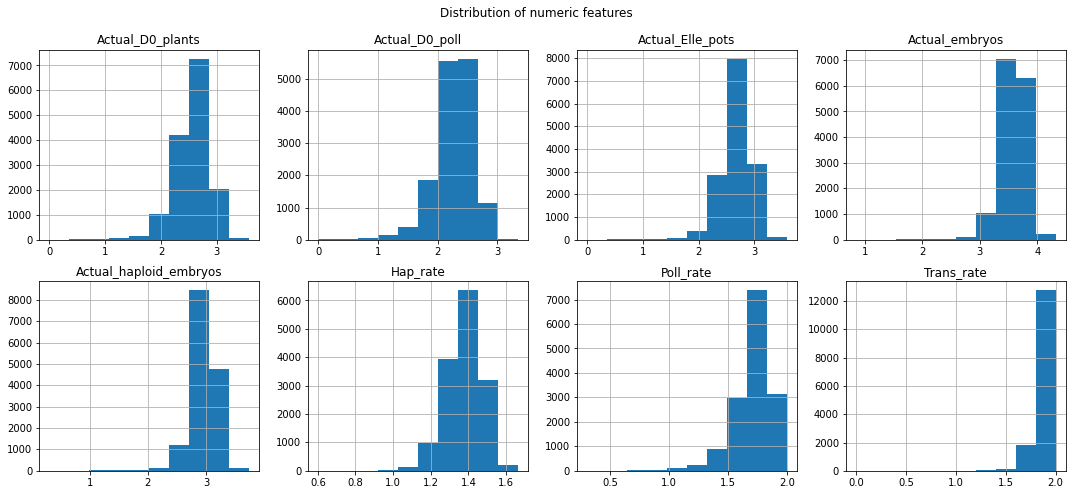

In [114]:
#since df['Poll_rate'] column contains infinite value, replaced the +/-inf values into nan's and droped rows with nan's
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna()

df.hist(layout=(3,4), figsize=(15,10))
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=1.0)      
#Tight layout often produces nice results but requires the title to be spaced accordingly
plt.tight_layout()
plt.suptitle('Distribution of numeric features', Fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()

### Summar: log transformation improved the distribution of numeric columns, but still some skewness is there. 

# 4.2 Feature engineering of categorical features of the dataset

# 4.2.1 Encoding catogorical features with LabelEncoder
Encode the categorical features (change categorical data to numbers), fed to the machine learning models

In [115]:
df=data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Site'] = label.fit_transform(df['Site'].values)
df['BreedingZone'] = label.fit_transform(df['BreedingZone'].values)
df['EvaluationZone'] = label.fit_transform(df['EvaluationZone'].values)
df['HetGrp'] = label.fit_transform(df['HetGrp'].values)
df['Type'] = label.fit_transform(df['Type'].values)

print(df.head())

                     Site  Year Quarter  BreedingZone  EvaluationZone  HetGrp  \
Request_id GE_ID                                                                
178950     67133087     0  2015       1             0              11       1   
178955     67133419     0  2015       1             0              11       1   
178969     67226512     0  2015       1             0              11       0   
178971     67226501     0  2015       1             0              11       0   
178973     67226717     0  2015       1             0              11       0   

                     Type  Actual_embryos  Actual_haploid_embryos  Hap_rate  \
Request_id GE_ID                                                              
178950     67133087     3            9425                    1308        14   
178955     67133419     3            8029                    1206        15   
178969     67226512     2            3373                     976        29   
178971     67226501     2            

In [117]:
df.shape

(14811, 15)

## Summary of LabelEncoder, it uniquely label/set different categories of catogorical variable 0 to n-1 (0,1,2,3). Since some number is greater than others, this can skew the models leading to inaccurate results.

## 4.2.2 One-hot Encoding; creates dummy columns
One hot encoding create ’n’ columns where n is the number of unique values that the nominal variable.



In [118]:
# create dummy columns for categorical features
dummy_data=pd.get_dummies(data=data, columns=['Site','Year','Quarter','BreedingZone','EvaluationZone','HetGrp','Type'])
dummy_data.head()


,,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,Site_0,Site_1,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
Request_id,GE_ID,,,,,,,,,,,,,,,,,,,,,
178950,67133087,9425,1308,14,599.0,537.0,90.0,256.0,48.0,1,0,...,0,0,1,0,0,1,0,0,0,1
178955,67133419,8029,1206,15,699.0,606.0,87.0,299.0,49.0,1,0,...,0,0,1,0,0,1,0,0,0,1
178969,67226512,3373,976,29,466.0,270.0,58.0,196.0,73.0,1,0,...,0,0,1,0,1,0,0,0,1,0
178971,67226501,4227,1189,28,518.0,310.0,60.0,184.0,59.0,1,0,...,0,0,1,0,1,0,0,0,1,0
178973,67226717,5360,1277,24,623.0,516.0,83.0,286.0,55.0,1,0,...,0,0,1,0,1,0,0,0,1,0


#### Summary of One-hot Encoding: notice that different columns were generated for each catogorical varible value and assigned values to 0 & 1  

In [119]:
dummy_data.shape

(14811, 42)

# 4.3 Split the data into train and test subsamples

In [120]:
X=dummy_data.drop(['Hap_rate'], axis=1)
y=dummy_data[['Hap_rate']]

In [121]:
X.shape

(14811, 41)

In [122]:
y.shape

(14811, 1)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
#X_test.head()
print('X_train size:', X_train.size)
print('X_test size:', X_test.size)
print('y_train size:', y_train.size)
print('y_test size:', y_test.size)


X_train size: 485768
X_test size: 121483
y_train size: 11848
y_test size: 2963


In [125]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (11848, 41)
X_test shape: (2963, 41)
y_train shape: (11848, 1)
y_test shape: (2963, 1)


# 4.4 Scale the numeric data

scale() transforms numeric data columns with mean 0 and std 1.0

build scaler based on training data and apply it to test data to then also scale the test data

In [126]:
#scale the data
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [128]:
## slicing numeric data (int, float) by excluding object datatype
num_fea=X.select_dtypes(exclude='object')
num_fea.head()

,,Actual_embryos,Actual_haploid_embryos,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,Site_0,Site_1,Year_2015,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
Request_id,GE_ID,,,,,,,,,,,,,,,,,,,,,
178950,67133087,9425,1308,599.0,537.0,90.0,256.0,48.0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
178955,67133419,8029,1206,699.0,606.0,87.0,299.0,49.0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
178969,67226512,3373,976,466.0,270.0,58.0,196.0,73.0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
178971,67226501,4227,1189,518.0,310.0,60.0,184.0,59.0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
178973,67226717,5360,1277,623.0,516.0,83.0,286.0,55.0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


# 4.5 Feature correlation heatmap
Gives high level view of relationships amongst the features

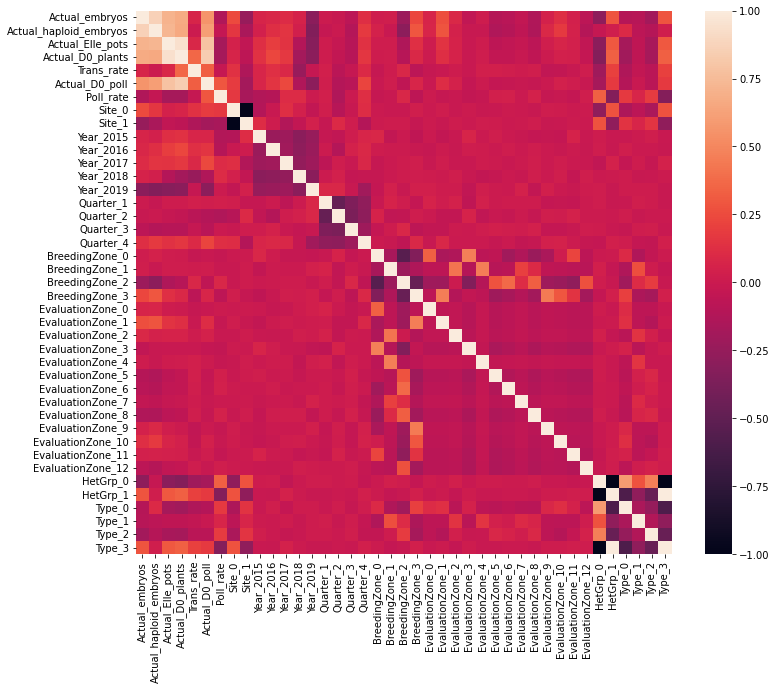

In [131]:
#Show a seaborn heatmap of correlations in data
#Hint: call pandas' `corr()` method on `data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(num_fea.corr());

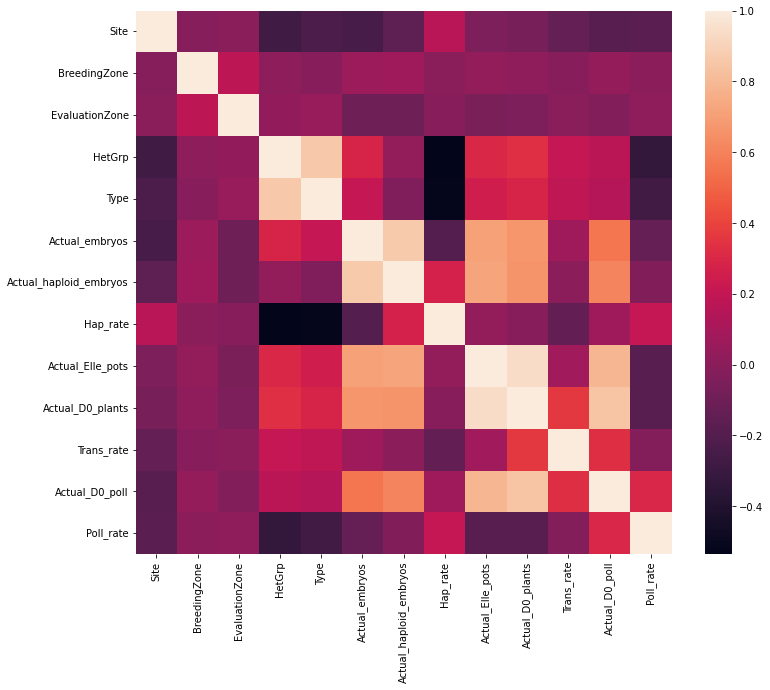

In [132]:
#Show a seaborn heatmap of correlations in data
#Hint: call pandas' `corr()` method on `data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

##### None of the numeric features are correlated with target variable: Hap_rate

# 4.6 Scatterplots of numeric features against target variable: Hap_rate

Correlations, in heatmap is a great first pass at identifying patterns. But correlation can mask relationships between two variables. A series of scatterplots help to really dive into how Hap_rate varies with other numeric features.

In [133]:
# define useful function to create scatterplots of Hap_rate against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.8)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Hap_rate', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Hap_rate')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [134]:
#Use a list comprehension to build a list of features from the columns of `data` that
#are _not_ any of categorical columns, or 'Hap_rate'
features = [col for col in data.columns if col not in ['Site', 'BreedingZone','EvaluationZone','HetGrp','Type','Hap_rate']]
len(features)

9

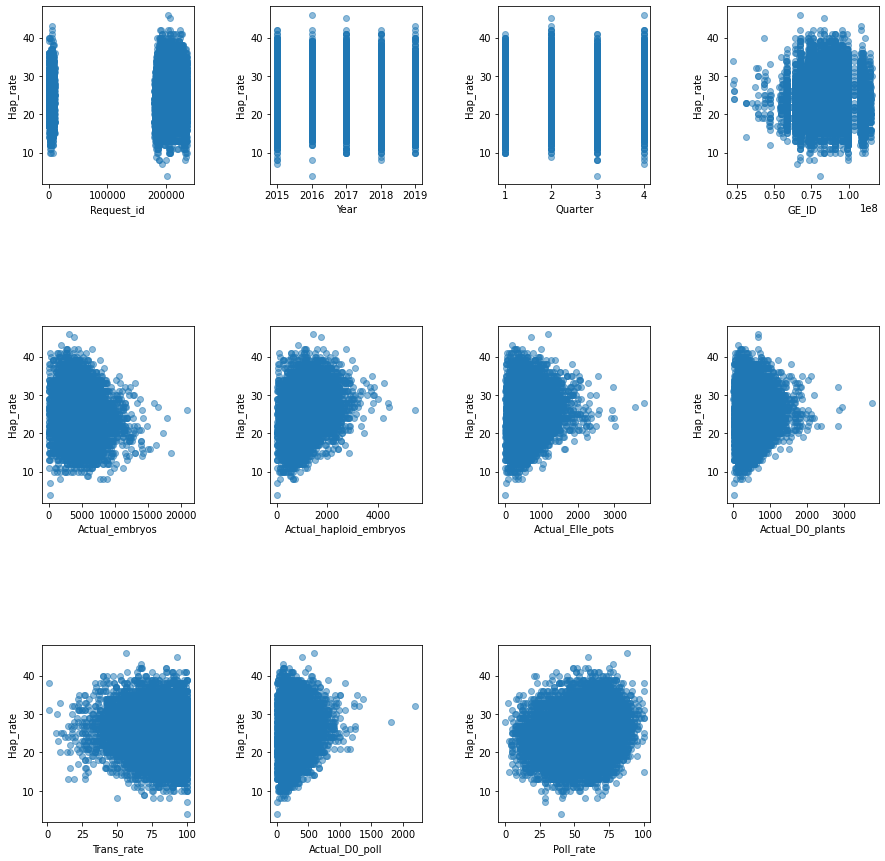

In [26]:
scatterplots(features, ncol=4, figsize=(15, 15))

# conclusion: No strong correlation is observed between Hap_rate and other numeric features

# 4.7 Feature Selection

In [135]:
# import libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# devide predictors and target, to keep things simple, we'll use only numerical predictors
data_num = data.drop(['Hap_rate'], axis=1)
X = data_num.select_dtypes(exclude=['object'])
y = data.Hap_rate

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %s, Selected=%s, Rank: %d' % (X.columns[i], rfe.support_[i], rfe.ranking_[i]))


Column: Site, Selected=False, Rank: 8
Column: BreedingZone, Selected=False, Rank: 6
Column: EvaluationZone, Selected=False, Rank: 3
Column: HetGrp, Selected=False, Rank: 7
Column: Type, Selected=False, Rank: 5
Column: Actual_embryos, Selected=True, Rank: 1
Column: Actual_haploid_embryos, Selected=True, Rank: 1
Column: Actual_Elle_pots, Selected=True, Rank: 1
Column: Actual_D0_plants, Selected=False, Rank: 4
Column: Trans_rate, Selected=True, Rank: 1
Column: Actual_D0_poll, Selected=False, Rank: 2
Column: Poll_rate, Selected=True, Rank: 1


In [ ]:
Summary: ARE any columns need to be dropped before setting up the model?